                                         Red wine quality Prediction

# Importing The Dependenies 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Importing the dataset

wine = pd.read_csv("https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.csv?raw=True")

#Exploratory Data Analysis : 

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine.shape

(1599, 12)

In [6]:
#cheaking for correlation
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

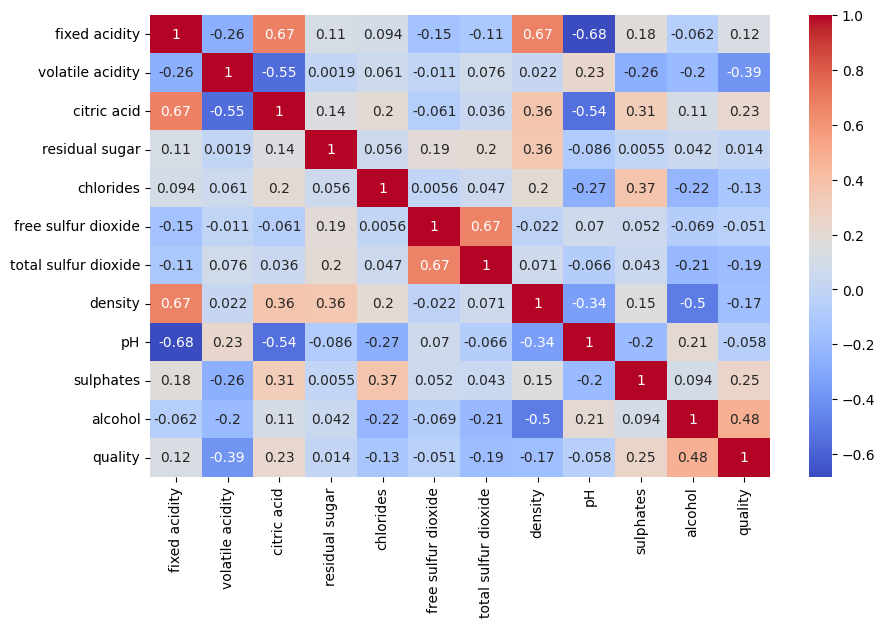

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(wine.corr(),annot = True,cmap='coolwarm')

<Axes: ylabel='Count'>

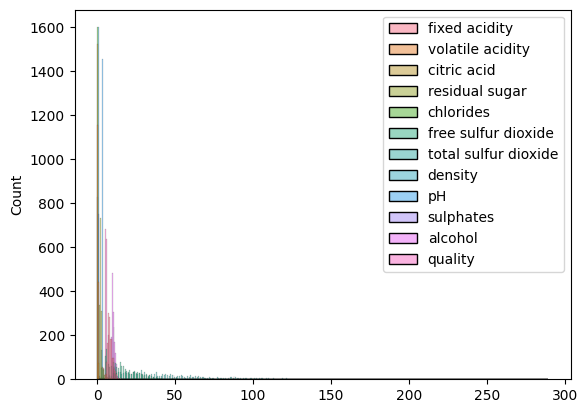

In [8]:
sns.histplot(data = wine)

<Axes: >

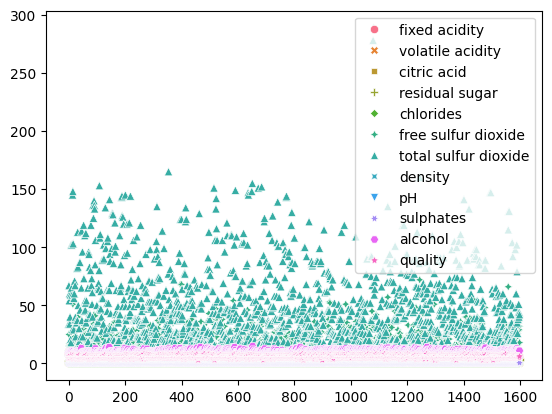

In [9]:
sns.scatterplot(wine)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

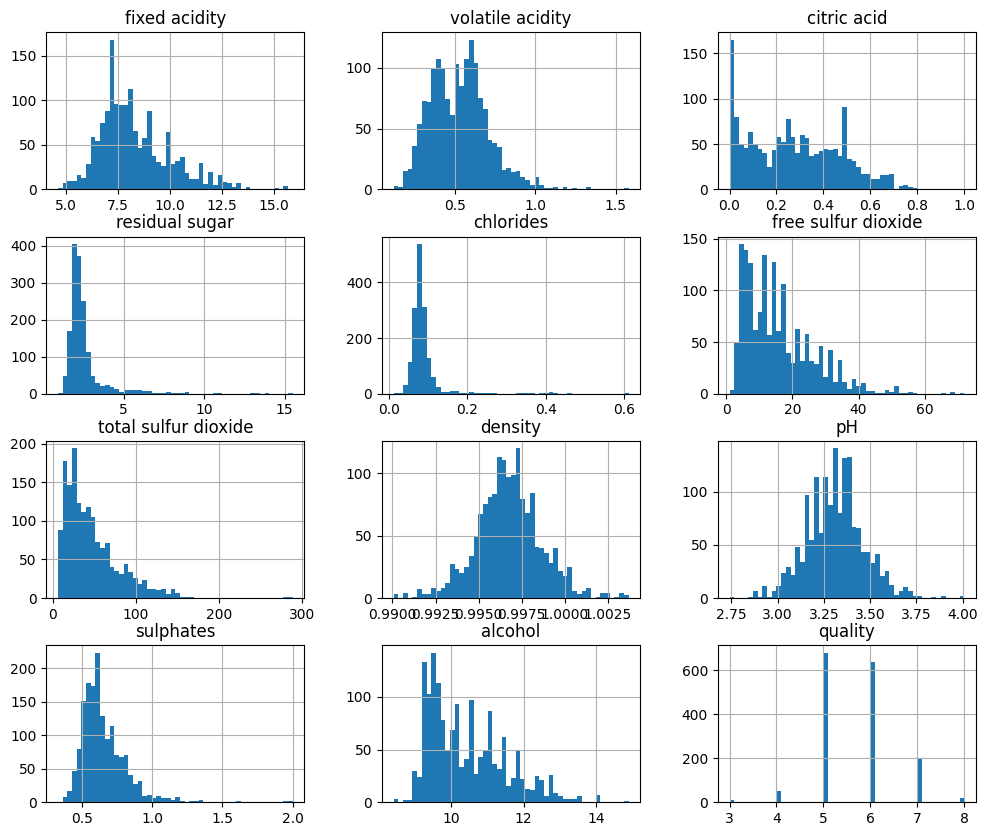

In [10]:
wine.hist(figsize=(12,10),bins=50)

In [11]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

In [12]:
#setting the cutoff to 7
wine['g_quality'] = [1 if x>=7 else 0 for x in wine ['quality']]
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,g_quality
1531,6.1,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,3.60,0.66,10.20,5,0
162,7.8,0.530,0.04,1.7,0.076,17.0,31.0,0.99640,3.33,0.56,10.00,6,0
1482,7.2,0.580,0.54,2.1,0.114,3.0,9.0,0.99719,3.33,0.57,10.30,4,0
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.40,5,0
1521,6.9,0.480,0.20,1.9,0.082,9.0,23.0,0.99585,3.39,0.43,9.05,4,0


In [13]:
#spliting the dataset into train and test dataset
x = wine.drop(columns = ["quality","g_quality"] , axis = 1)
y = wine['g_quality']


In [14]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: g_quality, Length: 1599, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 2)


In [17]:
predi = DecisionTreeClassifier()
predi = predi.fit(x_train, y_train)

In [18]:
accuracy = predi.score(x_test, y_test)
print(accuracy)

0.884375


Importing the Alogs 

In [32]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.metrics import accuracy_score

# selecting the best model for the hyper parameter tunning


In [20]:
models = { DecisionTreeClassifier : DecisionTreeClassifier() , SVC : SVC() , RandomForestClassifier : RandomForestClassifier() ,
          KNeighborsClassifier : KNeighborsClassifier() 
    
}

In [21]:
models 

{sklearn.tree._classes.DecisionTreeClassifier: DecisionTreeClassifier(),
 sklearn.svm._classes.SVC: SVC(),
 sklearn.ensemble._forest.RandomForestClassifier: RandomForestClassifier(),
 sklearn.neighbors._classification.KNeighborsClassifier: KNeighborsClassifier()}

def best_model():
    for model in models :
        model.fit(x_train , y_train)
        #evaulating the model 
        modelspredictiton = model.predict(x_test)
        accuracy = accuracy_score(y_test , y_train)
        print('Accuracy score', models , '=' , accuracy)

In [22]:
def best_model():
    for model_name, model in models.items():
        model.fit(x_train, y_train)
        # Evaluating the model
        models_predictiton = model.predict(x_test)
        accuracy = accuracy_score(y_test,   models_predictiton )
        print('Accuracy score for', model_name, '=', accuracy)

In [23]:
best_model()

Accuracy score for <class 'sklearn.tree._classes.DecisionTreeClassifier'> = 0.875
Accuracy score for <class 'sklearn.svm._classes.SVC'> = 0.875
Accuracy score for <class 'sklearn.ensemble._forest.RandomForestClassifier'> = 0.934375
Accuracy score for <class 'sklearn.neighbors._classification.KNeighborsClassifier'> = 0.8875


# For the hyperparameter tunning 

In [24]:
#loading the model  and dictionary for the parameters
model = RandomForestClassifier()

In [25]:
parameters = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2', None]  
}


In [26]:
classifier = RandomizedSearchCV (model , parameters , cv = 5)
classifier.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]})

In [27]:
best_parameters = classifier.best_params_
best_parameters

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None}

In [28]:

best_rf_params = {'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 20}
#tranning the model with best parameters
best_rf_model = RandomForestClassifier(**best_rf_params)


# MODEL EVALUATION

In [29]:
best_rf_model.fit(x_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(x_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", round(accuracy, 2)) 


Accuracy Score: 0.92


# AUC AND ROC CURVE FOR EVALUATION 

ROC AUC Score: 0.9133


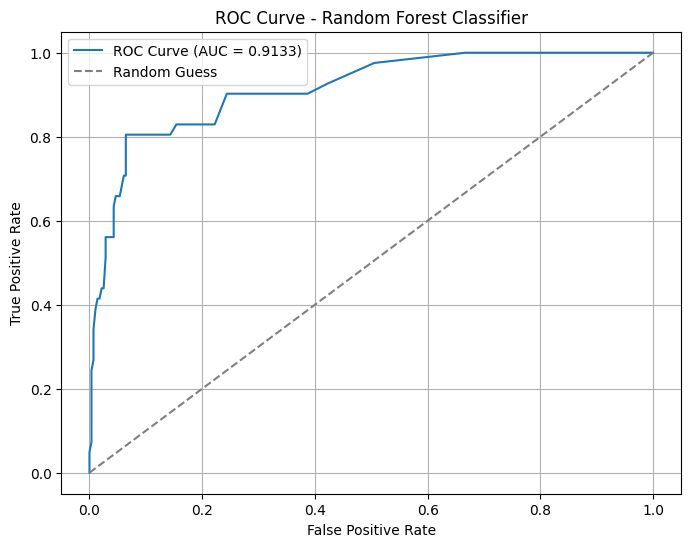

In [36]:
y_pred_proba = best_rf_model.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()